In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

data_train is for training model,data_test is for testing model.
no of classes can be found with np.unique(y_train)

In [2]:
dataset=tf.keras.datasets.cifar100
data_train,data_test=dataset.load_data(label_mode="fine")
x_train,y_train=data_train
x_test,y_test=data_test


no_classes=len(np.unique(y_train))
print(no_classes)

100


In [3]:
classes=[
    "apple",
    "aquarium_fish",
    "baby",
    "bear",
    "beaver",
    "bed",
    "bee",
    "beetle",
    "bicycle",
    "bottle",
    "bowl",
    "boy",
    "bridge",
    "bus",
    "butterfly",
    "camel",
    "can",
    "castle",
    "caterpillar",
    "cattle",
    "chair",
    "chimpanzee",
    "clock",
    "cloud",
    "cockroach",
    "couch",
    "crab",
    "crocodile",
    "cup",
    "dinosaur",
    "dolphin",
    "elephant",
    "flatfish",
    "forest",
    "fox",
    "girl",
    "hamster",
    "house",
    "kangaroo",
    "keyboard",
    "lamp",
    "lawn_mower",
    "leopard",
    "lion",
    "lizard",
    "lobster",
    "man",
    "maple_tree",
    "motorcycle",
    "mountain",
    "mouse",
    "mushroom",
    "oak_tree",
    "orange",
    "orchid",
    "otter",
    "palm_tree",
    "pear",
    "pickup_truck",
    "pine_tree",
    "plain",
    "plate",
    "poppy",
    "porcupine",
    "possum",
    "rabbit",
    "raccoon",
    "ray",
    "road",
    "rocket",
    "rose",
    "sea",
    "seal",
    "shark",
    "shrew",
    "skunk",
    "skyscraper",
    "snail",
    "snake",
    "spider",
    "squirrel",
    "streetcar",
    "sunflower",
    "sweet_pepper",
    "table",
    "tank",
    "telephone",
    "television",
    "tiger",
    "tractor",
    "train",
    "trout",
    "tulip",
    "turtle",
    "wardrobe",
    "whale",
    "willow_tree",
    "wolf",
    "woman",
    "worm"
]

In [4]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

In [5]:
rescale = tf.keras.layers.Rescaling(1./255)
# testres=rescale(x_test[0])
# print(testres.numpy().max())
# print(testres.numpy().min())
# print(testres.shape)

In [6]:
# plt.figure(figsize=(10, 10))
# img=x_train[0]
# for i in range(9):
#   ax = plt.subplot(3, 3, i + 1)
#   augmented_image = data_augmentation(tf.expand_dims(img, 0))
#   plt.imshow(augmented_image[0]/255.0)
#   plt.axis("off")


In [7]:

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(32, 32, 3)),
    # tf.keras.layers.RandomFlip('horizontal'),
    # tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.Rescaling(1./255),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu',kernel_initializer = 'he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu',kernel_initializer = 'he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(128, (3, 3), activation='relu',kernel_initializer = 'he_uniform'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu',kernel_initializer = 'he_uniform'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(no_classes, activation='softmax',kernel_initializer = 'he_uniform')
])





/opt/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [8]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 13, 13, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 172,708 (674.64 KB)

 Trainable params: 172,260 (672.89 KB)

 Non-trainable params: 448 (1.75 KB)

In [10]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    if(logs.get('accuracy') > 0.90):
      print("\nReached 90% accuracy so cancelling training!")
      self.model.stop_training = True


In [11]:
batch_size=256
epochs=100
history=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_data=(x_test,y_test) ,callbacks=[myCallback()])

Epoch 1/100


/opt/miniconda3/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


196/196 ━━━━━━━━━━━━━━━━━━━━ 46s 226ms/step - accuracy: 0.0331 - loss: 4.8093 - val_accuracy: 0.0386 - val_loss: 5.4178
Epoch 2/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 63s 322ms/step - accuracy: 0.1095 - loss: 3.8897 - val_accuracy: 0.1019 - val_loss: 4.1311
Epoch 3/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 111s 569ms/step - accuracy: 0.1603 - loss: 3.5546 - val_accuracy: 0.2000 - val_loss: 3.3864
Epoch 4/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 87s 442ms/step - accuracy: 0.1986 - loss: 3.3137 - val_accuracy: 0.2506 - val_loss: 3.0971
Epoch 5/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 99s 506ms/step - accuracy: 0.2331 - loss: 3.1164 - val_accuracy: 0.2795 - val_loss: 2.9428
Epoch 6/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 117s 599ms/step - accuracy: 0.2607 - loss: 2.9625 - val_accuracy: 0.2950 - val_loss: 2.8318
Epoch 7/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 99s 507ms/step - accuracy: 0.2838 - loss: 2.8429 - val_accuracy: 0.3158 - val_loss: 2.7208
Epoch 8/100
196/196 ━━━━━━━━━━━━━━━━━━━━ 84s 428ms/step - accuracy: 0.3042 - loss: 2.7

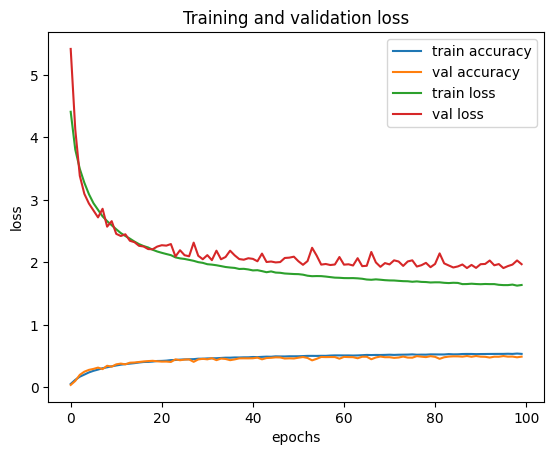

In [12]:
acc= history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs   = range(len(acc))

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc="lower right")
plt.title('Training and validation accuracy')

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc="upper right")
plt.title('Training and validation loss')
plt.show()

In [13]:
(loss,accuracy)=model.evaluate(x_test,y_test,batch_size,verbose=1)
print(accuracy*100)

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - accuracy: 0.4903 - loss: 1.9686
49.140000343322754


In [14]:
predict=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step


In [15]:
predicted_labels = np.argmax(predict, axis=1)

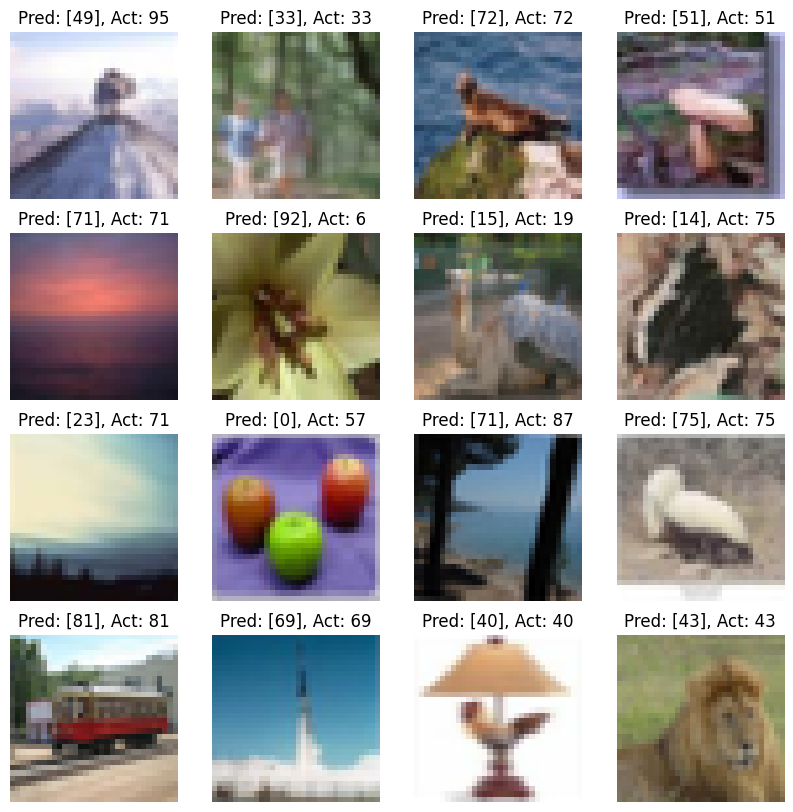

In [16]:
plt.figure(figsize=(10, 10))
for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(x_test[i]/255.0)
    plt.title(f'Pred: {y_test[i]}, Act: {predicted_labels[i]}')
    plt.axis("off")